# Task 32-> Clustering (KMeans)
K-Means clustering is an unsupervised learning algorithm used for partitioning data into distinct groups or clusters based on feature similarities. Each cluster is defined by its centroid, which is the mean position of all the points in the cluster. The algorithm aims to minimize the variance within each cluster, i.e., the sum of squared distances between each point and its corresponding centroid.

## Steps Involved in K-Means Clustering
### 1. Initialization:

Choose the number of clusters (k) you want to create.<br>
Randomly initialize the centroids of the k clusters. This can be done by randomly selecting k data points from the dataset or by using more advanced initialization techniques like k-means++ to improve convergence.
### 2. Assignment Step:

For each data point in the dataset, calculate the distance between the data point and each of the k centroids.<br>
Assign the data point to the cluster whose centroid is closest to it (using a distance metric like Euclidean distance).
### 3. Update Step:

After all points have been assigned to clusters, recompute the centroids by calculating the mean of all data points in each cluster.
### 4. Repeat:

Repeat the assignment and update steps until the centroids no longer change significantly, indicating that the algorithm has converged.
### 5. Final Cluster Formation:

The result is a set of clusters where the variance within each cluster is minimized.

## Importing Necessary Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

## Read the CSV file


In [2]:
df = pd.read_csv('Credit Card Customer Data.csv')

## First 5 Rows 

In [3]:
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## Information about dataset

In [4]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None


## Check for missing values


In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


## Select features for clustering


In [6]:
features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']
X = df[features]

## Standardize the features


In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# A. Elbow Method
The Elbow Method is a heuristic used to determine the optimal number of clusters (k) in K-Means clustering. It involves the following steps:

## Plotting Within-Cluster Sum of Squares (WCSS): 
For each k value (typically starting from 1 to a maximum reasonable value), calculate the WCSS, which is the sum of squared distances between each point and its assigned cluster centroid.
## Finding the Elbow Point: 
Plot WCSS against the number of clusters. The "elbow" point, where the rate of decrease sharply slows, suggests a good balance between variance explained and the number of clusters. This point typically indicates the optimal number of clusters.
# B. Silhouette Analysis
Silhouette analysis is another technique to determine the number of clusters. It measures how similar each data point is to its own cluster compared to other clusters:

## Silhouette Coefficient: 
The silhouette coefficient ranges from -1 to 1, where a value close to 1 indicates that the data point is well matched to its own cluster and poorly matched to neighboring clusters. A value close to -1 indicates the opposite.
## Silhouette Score for Different k: 
Compute the average silhouette score for different k values. The k with the highest average silhouette score is often chosen as the optimal number of clusters.

In [8]:
wcss = []
silhouette_scores = []

In [9]:
max_clusters = 10
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

## Plot Elbow Method and Silhouette Score


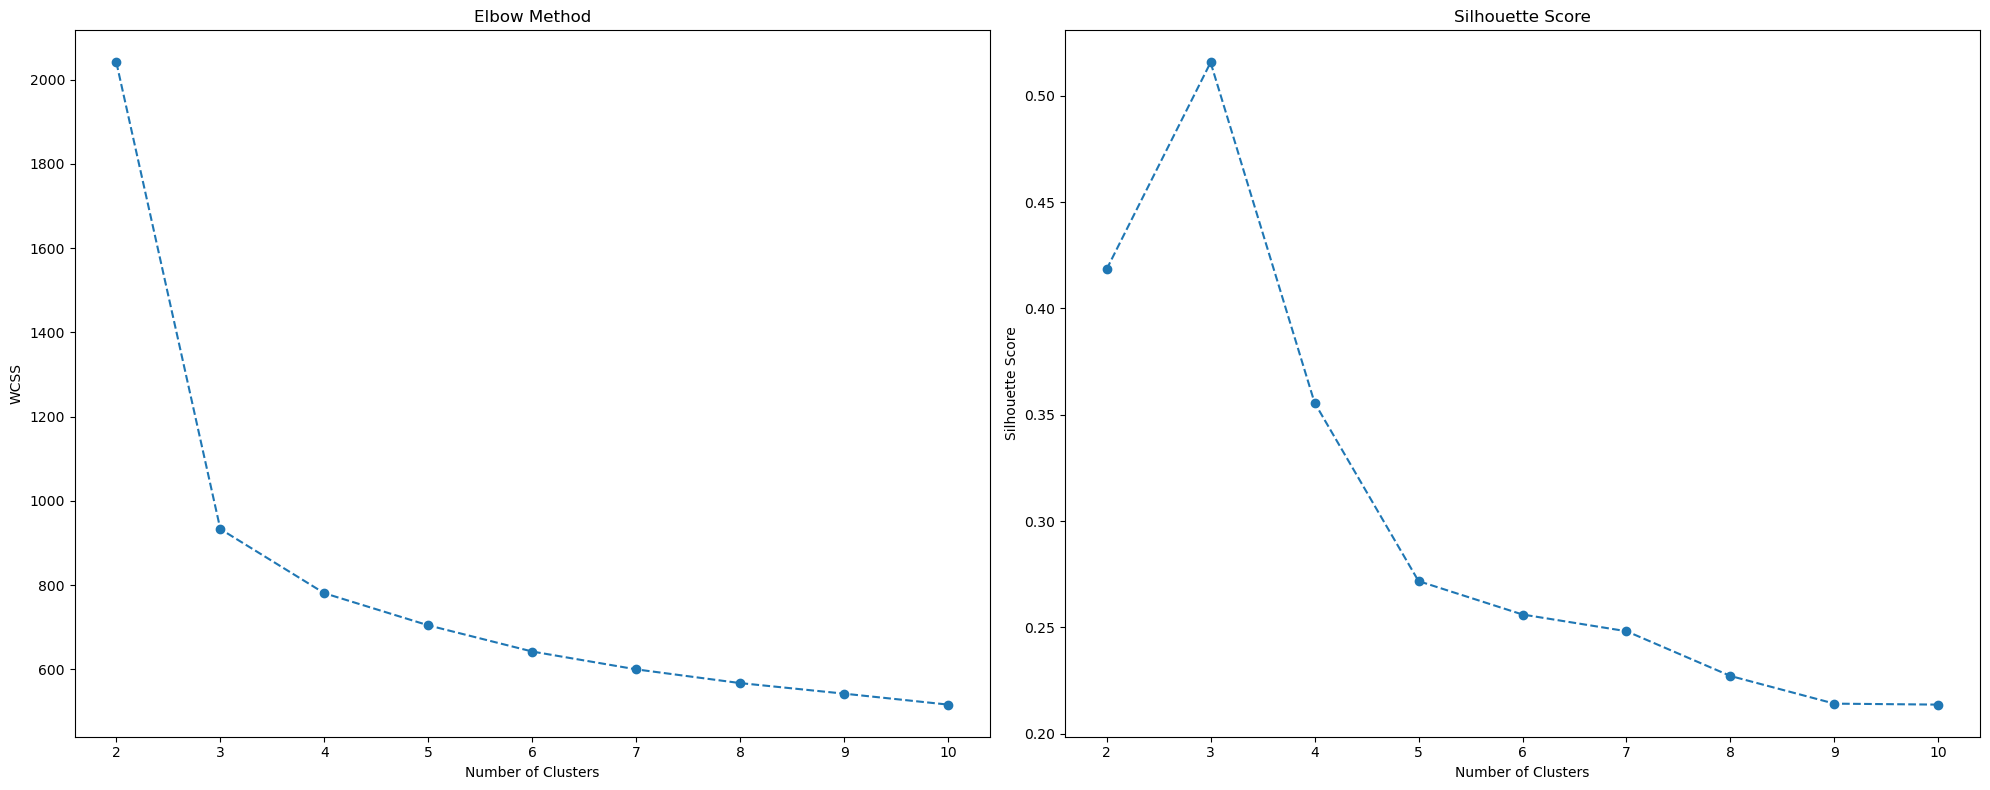

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='--')
ax1.set_title('Elbow Method')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS')

ax2.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
ax2.set_title('Silhouette Score')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## Choose the optimal number of clusters based on the evaluation metrics


Choose the number of clusters (k) you want to create.
Randomly initialize the centroids of the k clusters. This can be done by randomly selecting k data points from the dataset or by using more advanced initialization techniques like k-means++ to improve convergence.

In [11]:
n_clusters = 3  # we can adjust this based on the plots

## Perform K-Means clustering


### Distance Metrics
In K-Means clustering, the distance between data points and centroids is a crucial factor. The most commonly used distance metric is the Euclidean distance. However, depending on the nature of the data, other distance metrics like Manhattan, Minkowski, or cosine similarity might be used.

#### Euclidean Distance: 
The straight-line distance between two points in Euclidean space. It works well when the clusters are globular.
#### Manhattan Distance: 
The sum of the absolute differences between the coordinates of two points. It is useful when the data has high-dimensional features.
#### Cosine Similarity: 
Measures the cosine of the angle between two vectors, often used when data points represent text or other high-dimensional sparse data.

In [12]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

## Add cluster labels to the original dataframe


In [13]:
df['Cluster'] = cluster_labels

## Print evaluation metrics


In [14]:
print(f"\nSilhouette Score: {silhouette_score(X_scaled, cluster_labels):.4f}")


Silhouette Score: 0.5157


## Perform PCA for visualization


For high-dimensional data, techniques like PCA or t-SNE can reduce the dimensionality to two or three dimensions, allowing for visualization of clusters.

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Visualize the clusters using PCA


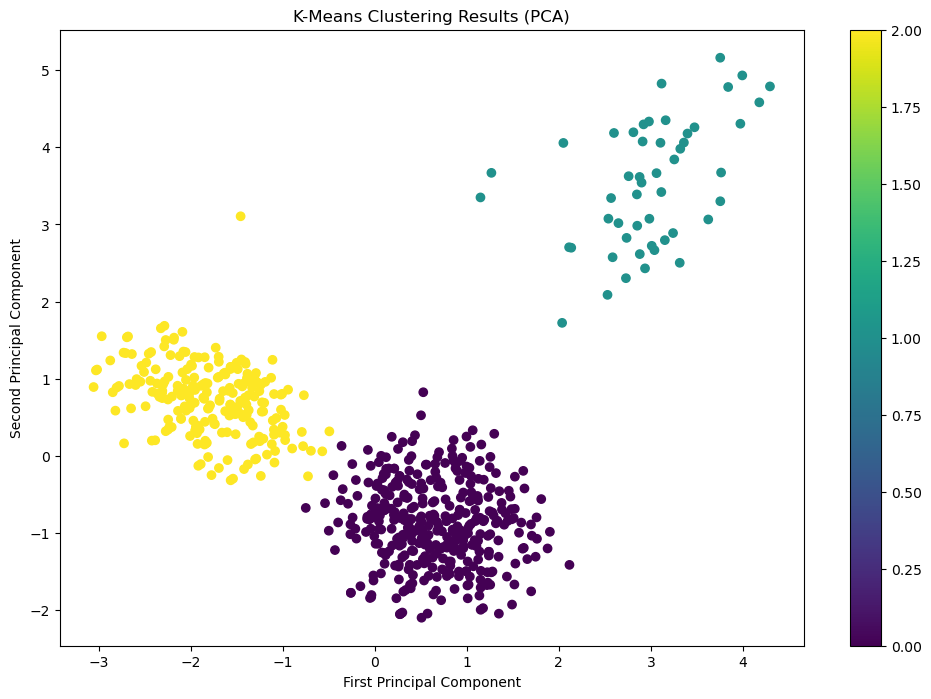

In [16]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering Results (PCA)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter)
plt.show()

For datasets with two or three features, scatter plots with different colors or markers for each cluster can effectively show the clusters.

## Visualize the clusters with centroids (using the first two features for 2D representation)


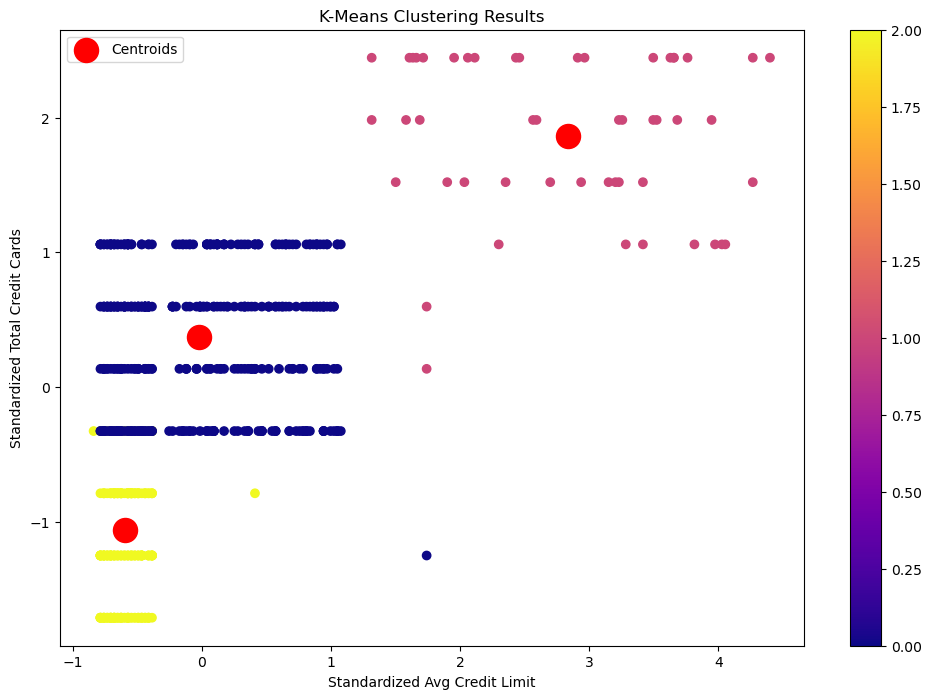

In [27]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='plasma')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('Standardized Avg Credit Limit')
plt.ylabel('Standardized Total Credit Cards')
plt.colorbar(scatter)
plt.legend()
plt.show()

Marking the cluster centers on the plot provides insights into the central tendencies of the clusters.

## Print cluster statistics


In [18]:
cluster_data = df[df['Cluster'] == 0]
print(f"\nCluster {0} Statistics:")
cluster_data[features].describe()


Cluster 0 Statistics:


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,386.000000,386.000000,386.000000,386.000000,386.000000
mean,33782.383420,5.515544,3.489637,0.981865,2.000000
std,22169.460696,1.140069,1.135563,0.857167,1.430648
min,5000.000000,2.000000,1.000000,0.000000,0.000000
25%,13000.000000,4.000000,3.000000,0.000000,1.000000
50%,31000.000000,6.000000,3.000000,1.000000,2.000000
75%,52000.000000,6.000000,5.000000,2.000000,3.000000
max,100000.000000,7.000000,5.000000,3.000000,4.000000


In [19]:
cluster_data = df[df['Cluster'] == 1]
print(f"\nCluster {1} Statistics:")
cluster_data[features].describe()


Cluster 1 Statistics:


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,141040.000000,8.740000,0.600000,10.900000,1.080000
std,34457.877272,1.274715,0.494872,2.880264,0.876915
min,84000.000000,5.000000,0.000000,6.000000,0.000000
25%,108750.000000,8.000000,0.000000,8.000000,0.000000
50%,145500.000000,9.000000,1.000000,11.000000,1.000000
75%,170000.000000,10.000000,1.000000,13.000000,2.000000
max,200000.000000,10.000000,1.000000,15.000000,3.000000


In [20]:
cluster_data = df[df['Cluster'] == 2]
print(f"\nCluster {2} Statistics:")
cluster_data[features].describe()


Cluster 2 Statistics:


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,224.000000,224.000000,224.000000,224.000000,224.000000
mean,12174.107143,2.410714,0.933036,3.553571,6.870536
std,5249.048524,1.100783,0.803567,1.218978,1.990161
min,3000.000000,1.000000,0.000000,1.000000,1.000000
25%,8000.000000,1.000000,0.000000,2.000000,5.000000
50%,12000.000000,2.000000,1.000000,4.000000,7.000000
75%,16000.000000,3.000000,2.000000,4.000000,9.000000
max,50000.000000,4.000000,2.000000,10.000000,10.000000


## Visualize feature distributions for each cluster


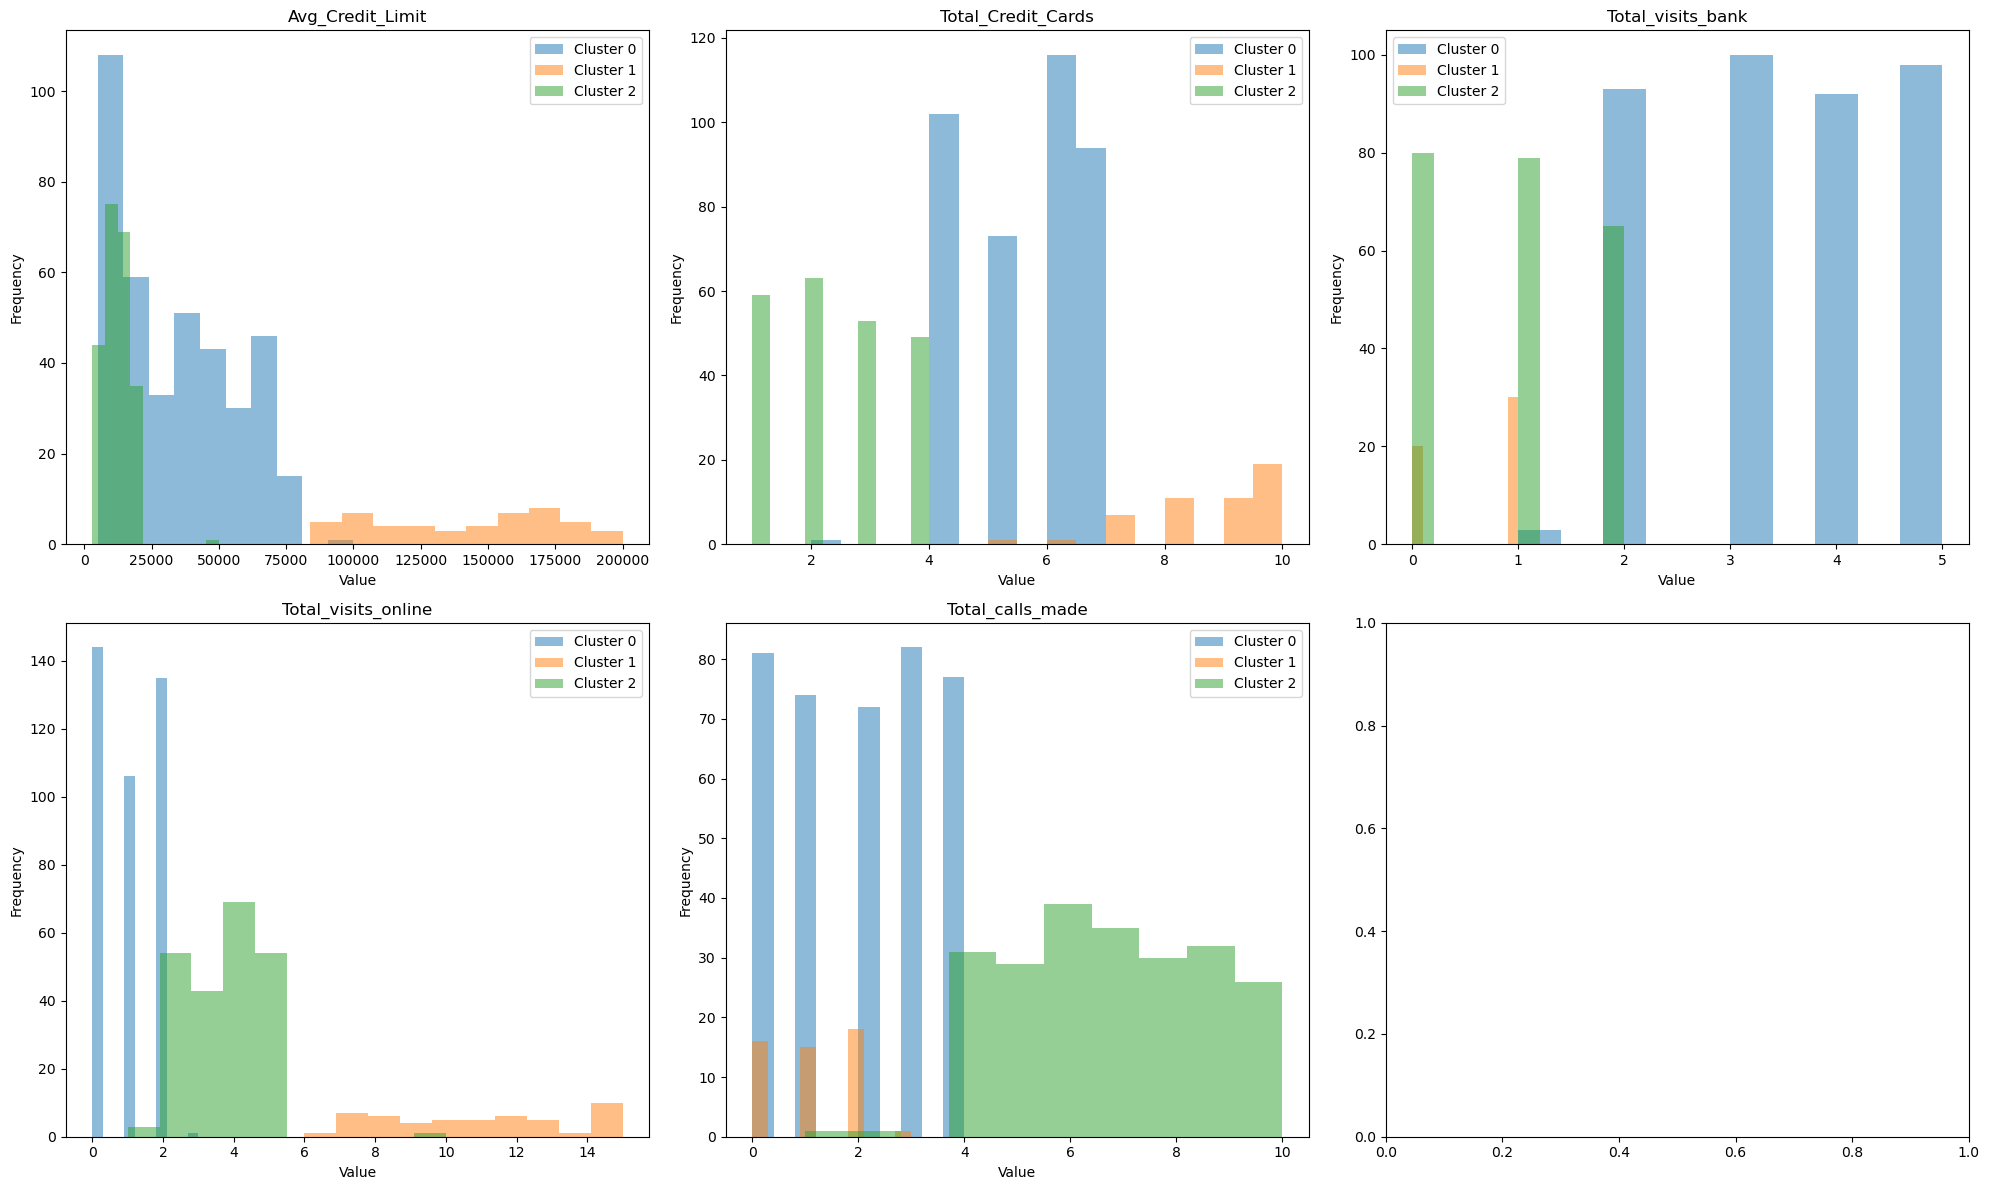

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    for cluster in range(n_clusters):
        cluster_data = df[df['Cluster'] == cluster]
        axes[i].hist(cluster_data[feature], alpha=0.5, label=f'Cluster {cluster}')
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Perform ANOVA test for each feature


In [22]:
for feature in features:
    f_statistic, p_value = f_oneway(*[group[feature].values for name, group in df.groupby('Cluster')])
    print(f"\nANOVA test for {feature}:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")


ANOVA test for Avg_Credit_Limit:
F-statistic: 880.2279
p-value: 0.0000

ANOVA test for Total_Credit_Cards:
F-statistic: 868.0508
p-value: 0.0000

ANOVA test for Total_visits_bank:
F-statistic: 555.0102
p-value: 0.0000

ANOVA test for Total_visits_online:
F-statistic: 1499.3490
p-value: 0.0000

ANOVA test for Total_calls_made:
F-statistic: 711.5230
p-value: 0.0000


## Parallel coordinates plot


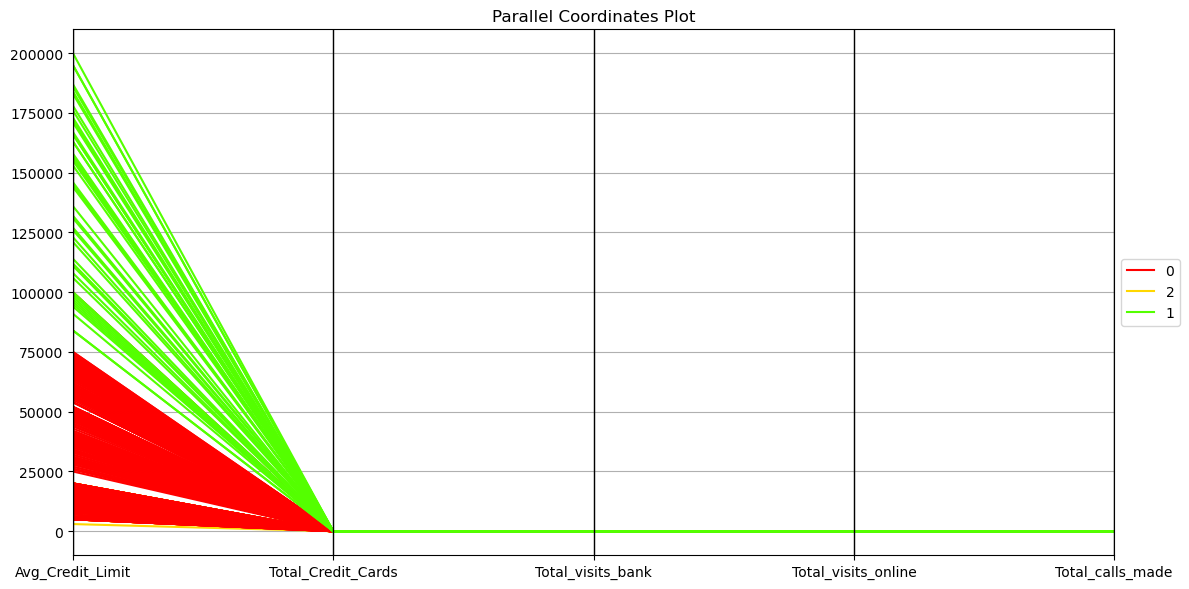

In [23]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12, 6))
parallel_coordinates(df[features + ['Cluster']], 'Cluster', colormap=plt.get_cmap("prism"))
plt.title('Parallel Coordinates Plot')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Making Radar Chart

In [24]:
# Calculate the mean values for each cluster
cluster_means = df.groupby('Cluster')[features].mean()

In [25]:
# Set up the angles for the radar chart
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

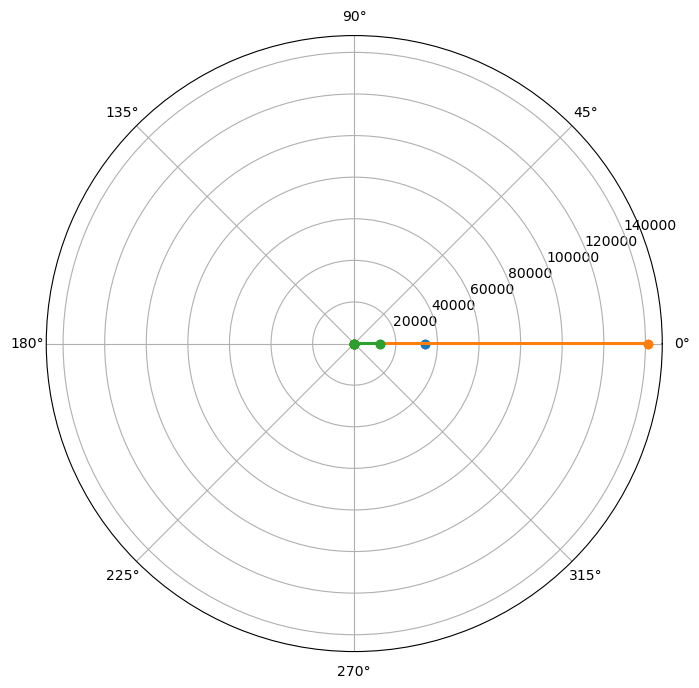

In [26]:
# Create the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
for i in range(n_clusters):
    values = cluster_means.iloc[i].values
    values = np.concatenate((values, [values[0]]))
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {i}')
    ax.fill(angles, values, alpha=0.25)